In [1]:
%matplotlib inline

from collections import defaultdict

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.style.use('bmh')

import plots
plots.plot_width = 10

# plots to draw in do_plots_all()
all_plots = ['select_real', 'store_real',
             'obj_select_real', 'obj_last_insert_real',
             'obj_insert_real', 'obj_store',
             'src_select_real', 'src_insert_real',
             'fsrc_select_real', 'fsrc_insert_real']
whiskers = 4.


# Test with Cassandra on GCP with 12-node cluster

JIRA ticket: https://jira.lsstcorp.org/browse/DM-28172

Setup is similar to DM-28154 but with 12 server nodes



In [2]:
data_files = [
    "data/DM-28172/apdb-gcp-4-20210105T192229.csv.gz",
    "data/DM-28172/apdb-gcp-4-20210105T195607.csv.gz",
    "data/DM-28172/apdb-gcp-4-20210105T214049.csv.gz",
    "data/DM-28172/apdb-gcp-4-20210105T235549.csv.gz",
    "data/DM-28172/apdb-gcp-4-20210106T191921.csv.gz",
    "data/DM-28172/apdb-gcp-4-20210107T060512.csv.gz",
    "data/DM-28172/apdb-gcp-4-20210107T213533.csv.gz",
    "data/DM-28172/apdb-gcp-4-20210108T051401.csv.gz",
    "data/DM-28172/apdb-gcp-4-20210108T171536.csv.gz",
    "data/DM-28172/apdb-gcp-4-20210109T055756.csv.gz",
    "data/DM-28172/apdb-gcp-4-20210109T191316.csv.gz",
    "data/DM-28172/apdb-gcp-4-20210110T090118.csv.gz",
    "data/DM-28172/apdb-gcp-4-20210110T233421.csv.gz",
    "data/DM-28172/apdb-gcp-4-20210111T144847.csv.gz",
    "data/DM-28172/apdb-gcp-4-20210112T064620.csv.gz",
    "data/DM-28172/apdb-gcp-4-20210112T231225.csv.gz",
    "data/DM-28172/apdb-gcp-4-20210113T160036.csv.gz",
    "data/DM-28172/apdb-gcp-4-20210114T091540.csv.gz",
    "data/DM-28172/apdb-gcp-4-20210115T030155.csv.gz",
    "data/DM-28172/apdb-gcp-4-20210115T211027.csv.gz",
    "data/DM-28172/apdb-gcp-4-20210116T154544.csv.gz",
    "data/DM-28172/apdb-gcp-4-20210117T103225.csv.gz",
    "data/DM-28172/apdb-gcp-4-20210118T053338.csv.gz",
    "data/DM-28172/apdb-gcp-4-20210119T010059.csv.gz",
    "data/DM-28172/apdb-gcp-4-20210119T165632.csv.gz",
]

In [3]:
frames = [plots._read_csv(file, filter_count=False)[0] for file in data_files]

In [4]:
df_cass = pd.concat(frames)
del frames
# strip visits that did not measure read time
df_cass = df_cass[(df_cass.index % 1000) < 100]

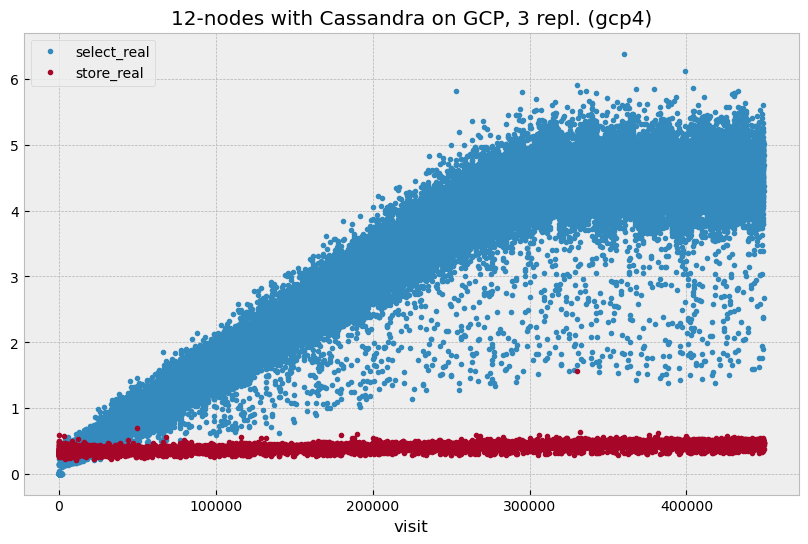

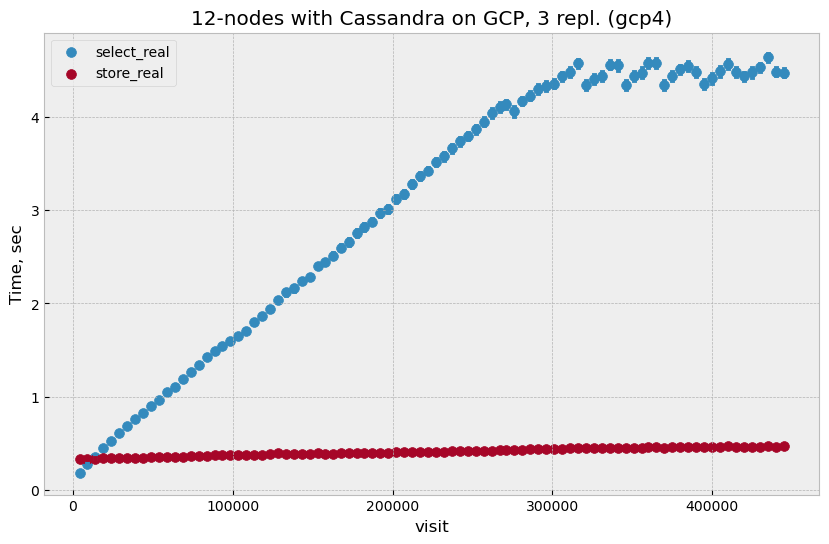

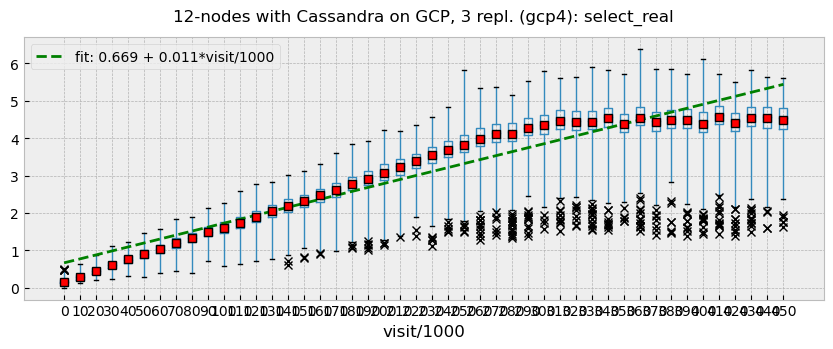

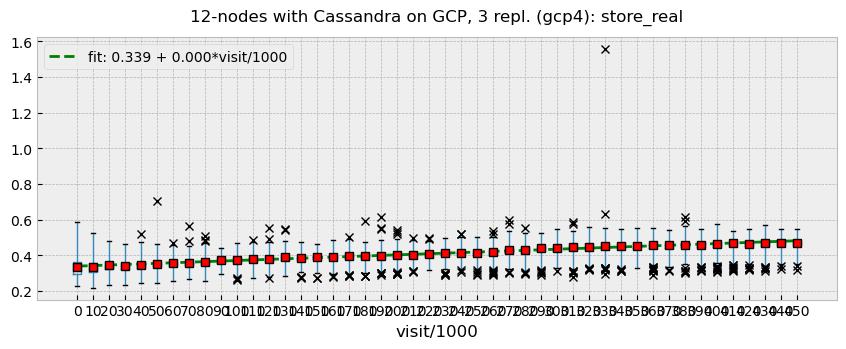

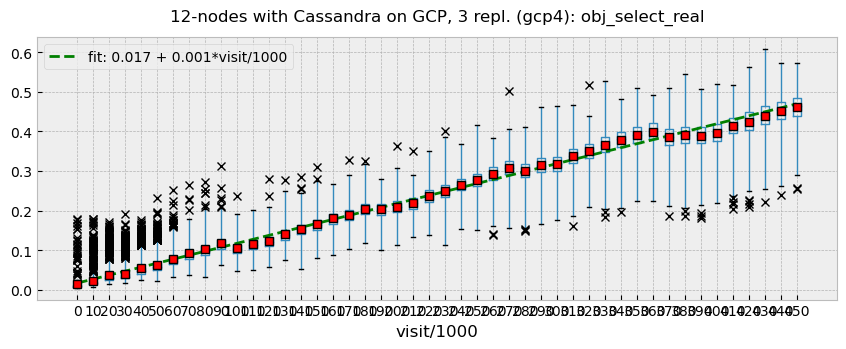

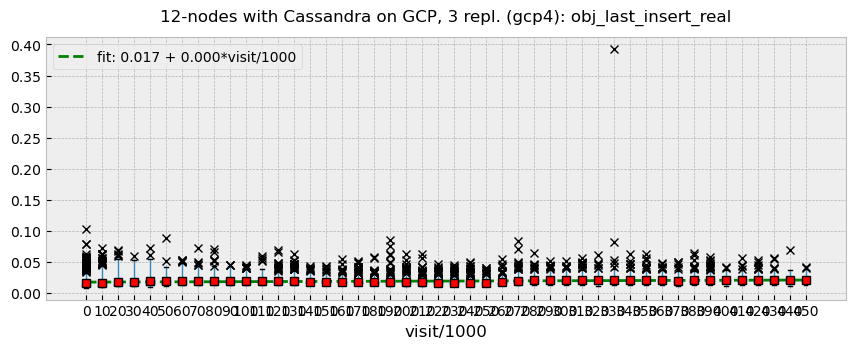

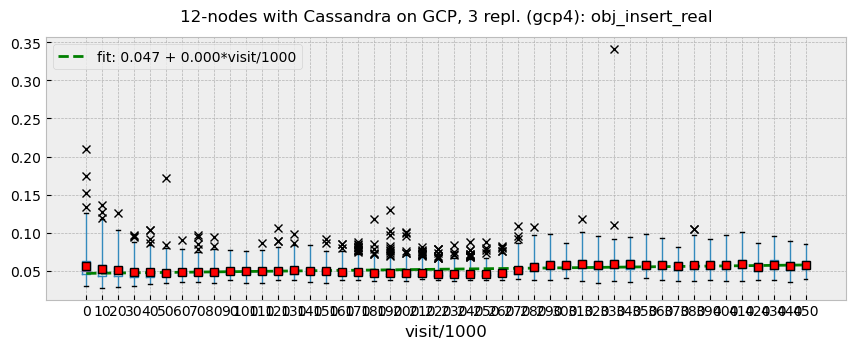

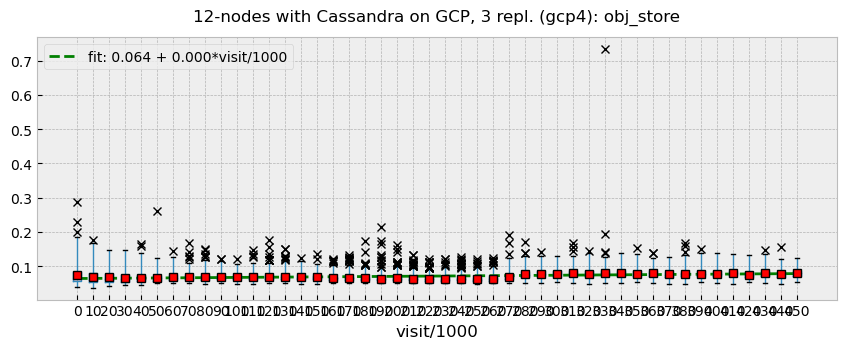

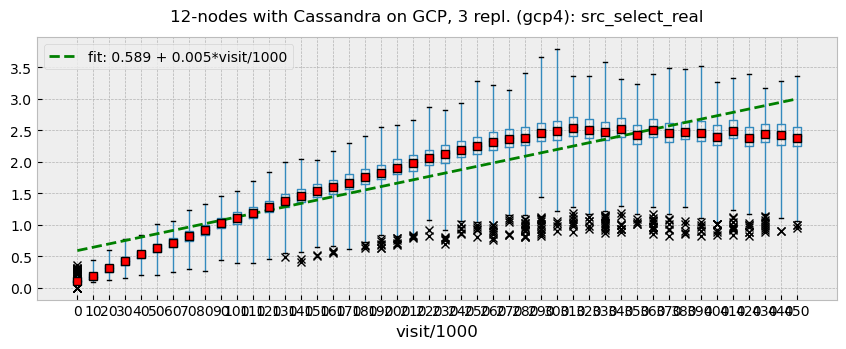

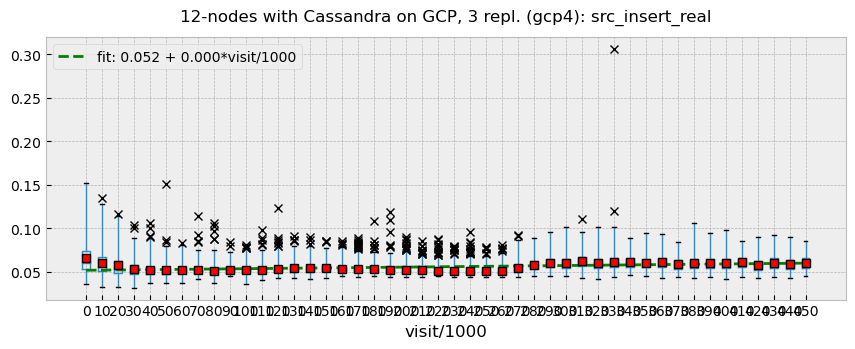

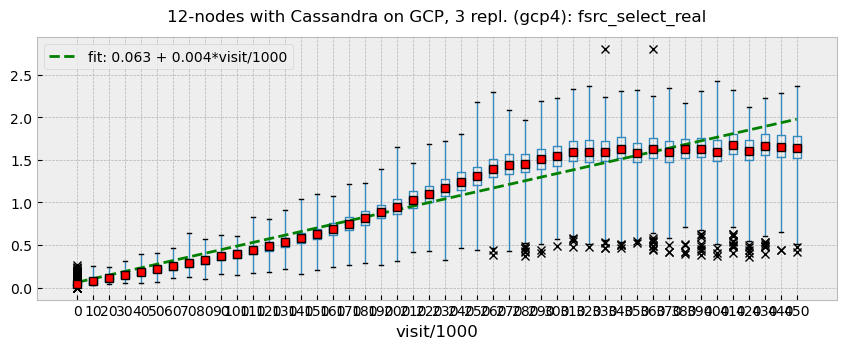

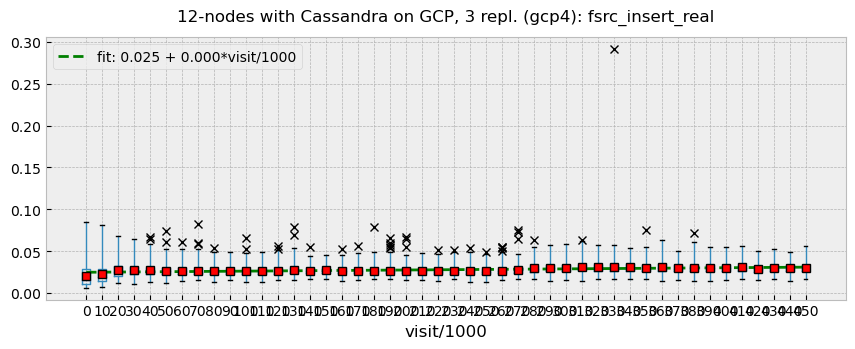

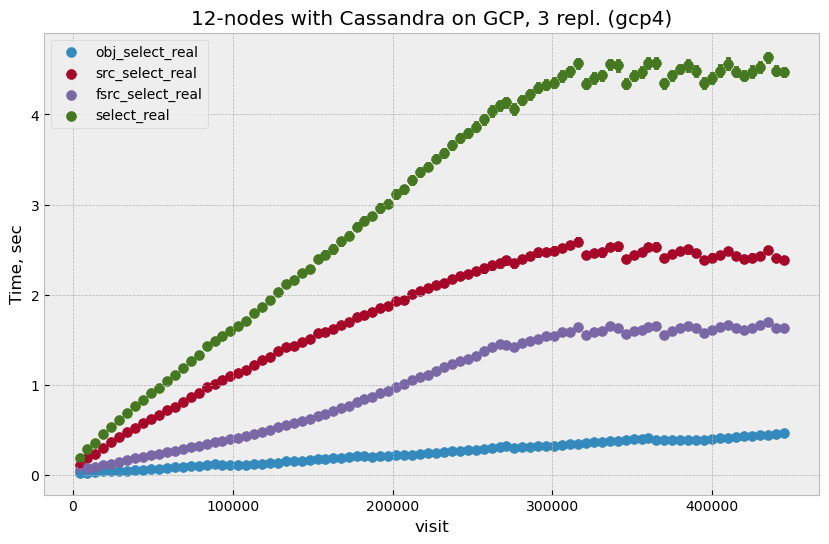

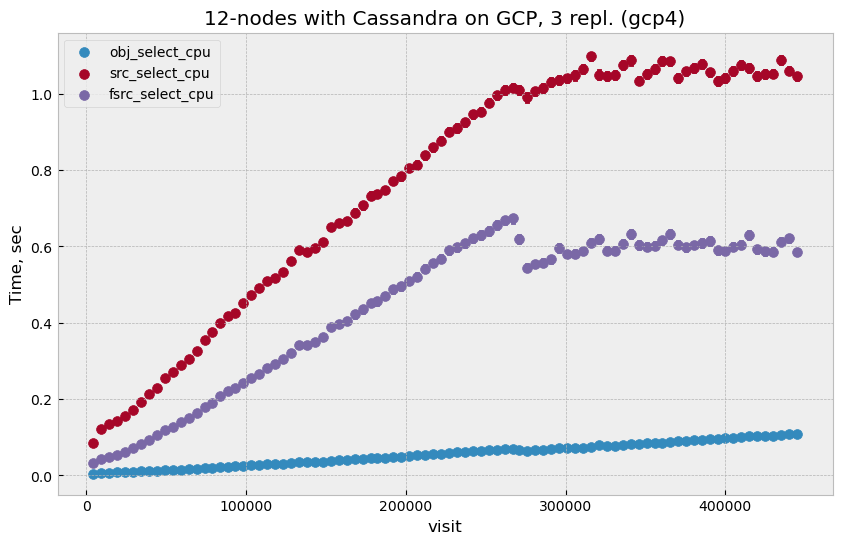

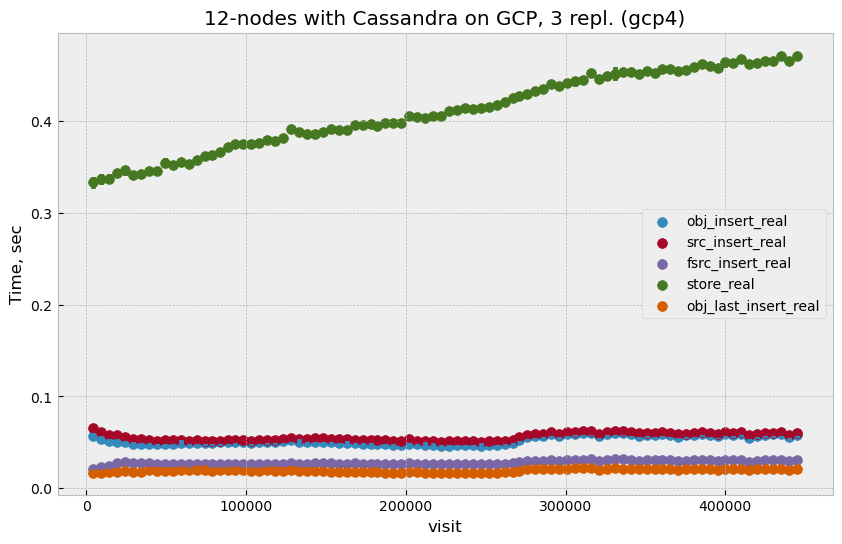

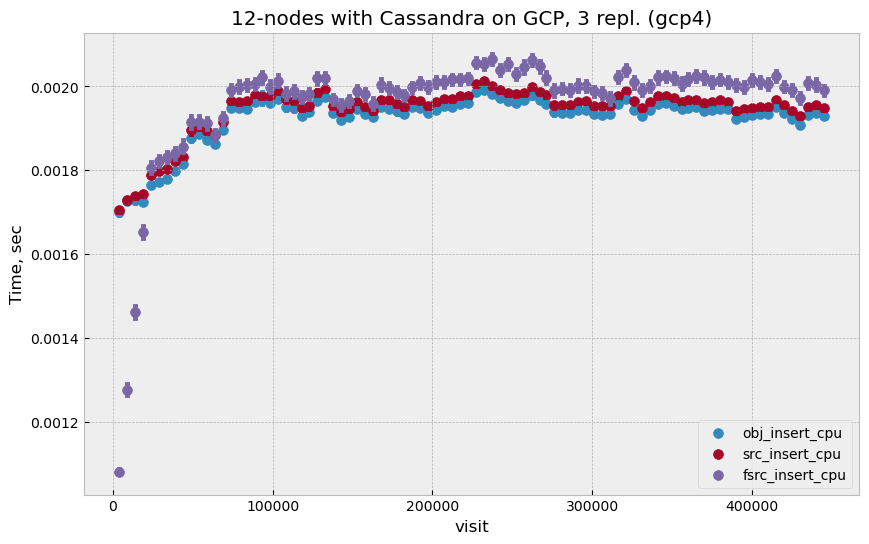

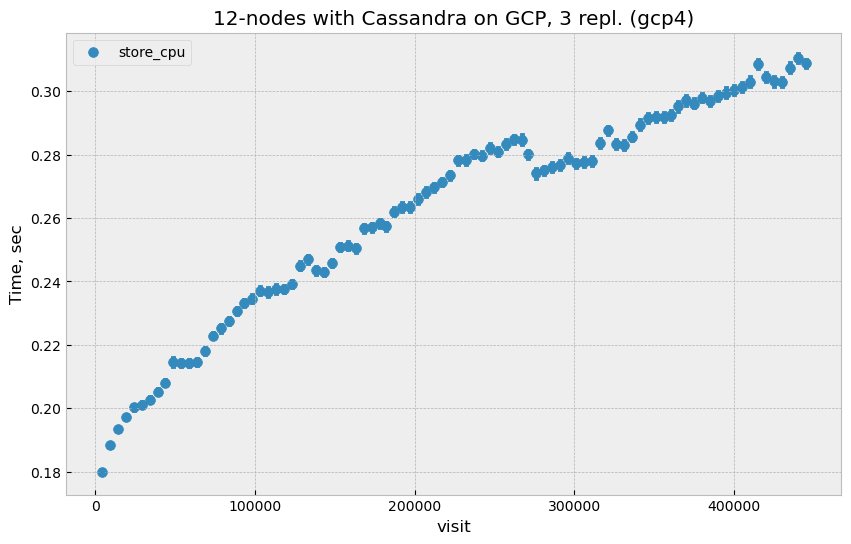

In [5]:
# fit_modes = dict(
#     store_real=None,
#     obj_last_insert_real=None,
#     src_insert_real=None,
#     fsrc_insert_real=None,
#     obj_insert_real=None,
#     src_insert_cpu=None,
#     fsrc_insert_cpu=None,
#     obj_insert_cpu=None,
#     store_cpu=None,
# )

title = "12-nodes with Cassandra on GCP, 3 repl. (gcp4)"
plots.do_plots_all(df_cass, title, bin=10000, plots=all_plots, whis=whiskers, fit_mode=None, fit_nbins=90);

### Fit for first 100k visits

To compare to previous tests

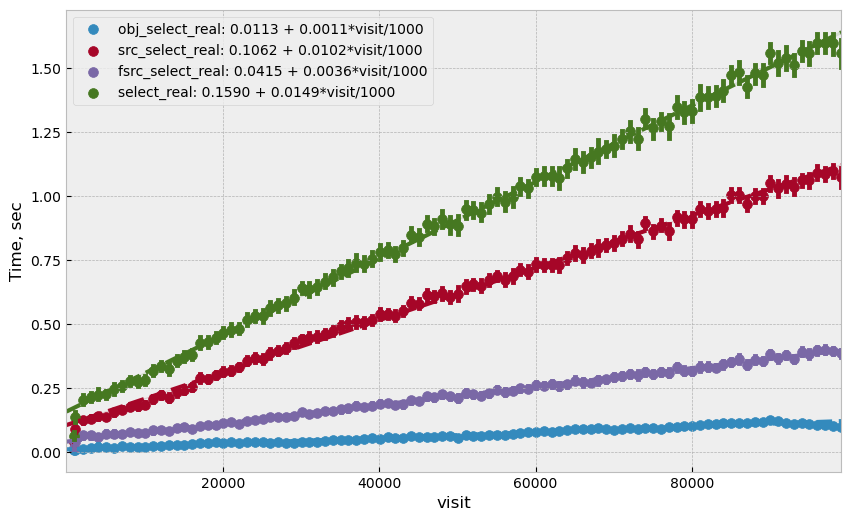

In [6]:
cols = ['obj_select_real', 'src_select_real', 'fsrc_select_real', 'select_real']
plots.plot_fit_times(df_cass[:9999], cols, fit_mode="poly", nbins=100);